<a href="https://colab.research.google.com/github/lukmanaj/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### WEEK 2 Exercises

####Name : Lukman Aliyu Jibril
####email: lukman.j.aliyu@gmail.com

### Exercises:
Please, see week 2 exercises from [**Learn PyTorch for Deep Learning**: 01. Pytorch Workflows](https://www.learnpytorch.io/01_pytorch_workflow/#exercises)

In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt # for visualization
from tqdm import tqdm # very nice library for seeing progress of loop operations


torch.__version__

'2.1.0+cu121'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


1. Create a straight line dataset using the linear regression formula (weight * X + bias).

*   Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

*   Split the data into 80% training, 20% testing.

*   Plot the training and testing data so it becomes visual.







In [3]:
weight = 0.3
bias = 0.9
# Create data
start = 0
end = 25
step = 0.2
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000],
         [1.0000],
         [1.2000],
         [1.4000],
         [1.6000],
         [1.8000]]),
 tensor([[0.9000],
         [0.9600],
         [1.0200],
         [1.0800],
         [1.1400],
         [1.2000],
         [1.2600],
         [1.3200],
         [1.3800],
         [1.4400]]))

In [4]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(100, 100, 25, 25)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

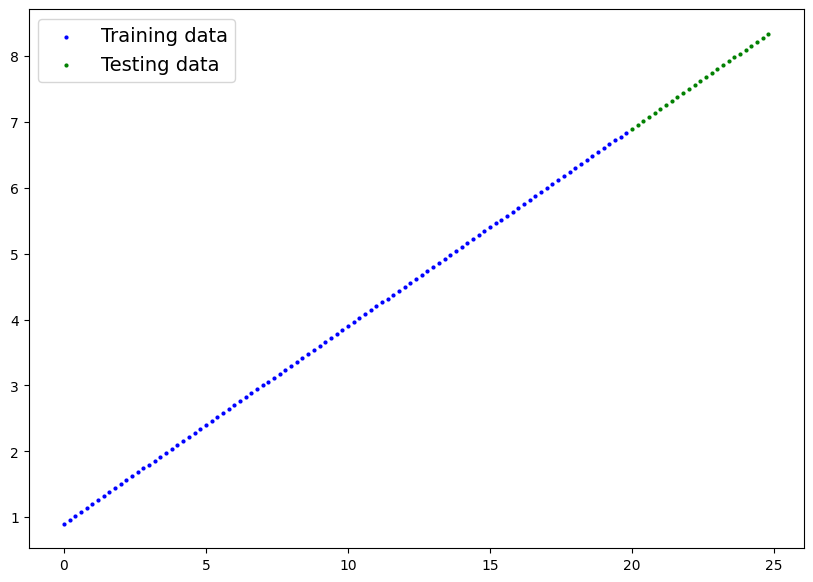

In [6]:
plot_predictions()

2. Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().

- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias



In [8]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)




In [9]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [10]:
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [11]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # using model_1
                            lr=0.01) #

In [12]:
torch.manual_seed(42)
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_1.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_1(X_train)
    # print(y_pred)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_1.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_1(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.4079560935497284 | MAE Test Loss: 2.278273105621338 
Epoch: 20 | MAE Train Loss: 0.32450252771377563 | MAE Test Loss: 1.484072208404541 
Epoch: 40 | MAE Train Loss: 0.2746686041355133 | MAE Test Loss: 0.5454003214836121 
Epoch: 60 | MAE Train Loss: 0.3228837847709656 | MAE Test Loss: 2.254345655441284 
Epoch: 80 | MAE Train Loss: 0.44555217027664185 | MAE Test Loss: 1.915177345275879 
Epoch: 100 | MAE Train Loss: 0.21672391891479492 | MAE Test Loss: 0.8878589868545532 
Epoch: 120 | MAE Train Loss: 0.417906790971756 | MAE Test Loss: 1.8623242378234863 
Epoch: 140 | MAE Train Loss: 0.38324204087257385 | MAE Test Loss: 1.8889905214309692 
Epoch: 160 | MAE Train Loss: 0.586805522441864 | MAE Test Loss: 1.3809274435043335 
Epoch: 180 | MAE Train Loss: 0.331992506980896 | MAE Test Loss: 1.9092423915863037 
Epoch: 200 | MAE Train Loss: 0.24652355909347534 | MAE Test Loss: 2.0612125396728516 
Epoch: 220 | MAE Train Loss: 0.2064310908317566 | MAE Test Loss: 2.114804

4. Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [13]:
model_1.eval()
#make predictions on test set
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[6.5164],
        [6.5744],
        [6.6324],
        [6.6904],
        [6.7484],
        [6.8064],
        [6.8644],
        [6.9224],
        [6.9805],
        [7.0385],
        [7.0965],
        [7.1545],
        [7.2125],
        [7.2705],
        [7.3285],
        [7.3865],
        [7.4445],
        [7.5025],
        [7.5605],
        [7.6185],
        [7.6765],
        [7.7345],
        [7.7925],
        [7.8505],
        [7.9085]])

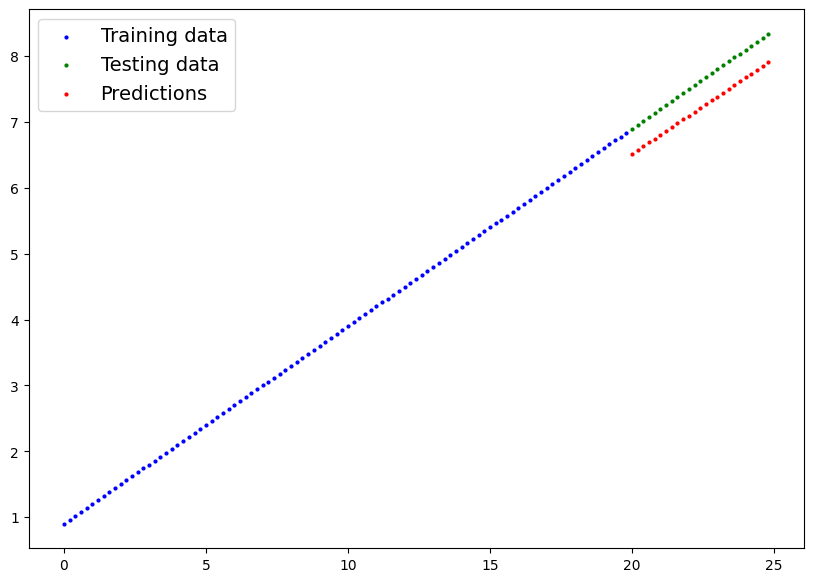

In [14]:
plot_predictions(predictions=y_preds.cpu())

5. Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [15]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [16]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
load_model = LinearRegressionModel()
load_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
load_model.to(device)

LinearRegressionModel()

In [17]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = load_model.cpu()(X_test.cpu())
y_preds.cpu() == y_preds_new.cpu()

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [18]:
load_model.state_dict()


OrderedDict([('weights', tensor([0.2900])), ('bias', tensor([0.7162]))])

### Additional Exercise
[Click to view PDF 📄](https://github.com/arewadataScience/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week2/ArewaDS_Deep_Learning_Advanced_Assignment_Week2.pdf)

Hello there! I hear you are now an expert in data manipulation and building linear regression models
with PyTorch. Here are a few tasks, I will need your help with using the Synchonous Machine Learning
Dataset.
## Instructions:

1. Feel free to explore beyond the below problems. There are right answers but no wrong approaches!
2. Code-based solutions should be in code cells and text-based answers should be in markdown cells.
3. You can use the hints ­ around.


1. PyTorch Fundamentals

Question 1. Loading our data...
(a) Load the Synchronous Machine Learning Dataset as Numpy array. ­
1
(b) Convert the Numpy array to PyTorch tensor, original data tensor.

Question 2. Art of ”Tensor Manipulation”

(a) Print the size of the dataset.

(b) Create a tensor, my pi tensor of same size as original data tensor containing values of 3.142 at
every point and placed on your GPU device. Print the first 13 rows. Print tensor device location.
Print tensor datatype.

(c) Print the fifth-root of the sum of all values in my pi tensor.

(d) Create a new tensor, my data tensor using the first and last 100 rows from the original data tensor.
Print size of my data tensor [Expect a size of 200 rows].

(e) Create two 1-D tensors, features and target from my data tensor. The feature is dIf (Changing
of excitation current of synchronous machine) I) column and target is If (Excitation current of
synchronous machine). ­


2
(f) Split your data into training and test data of ratio 75:25 respectively.
2. PyTorch Workflow Fundamentals


Question 3. Define your Linear model structure. You can use existing model.


Question 4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model
training and testing. Choose any set of hyperparameters for model training.

Question 5. Briefly comment on your results. What could be done to make the model or prediction
better? (< 60 words)

In [19]:
# import libraries
import zipfile
import pandas as pd
# download dataset in colab env
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip
# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
  my_zip.extractall()
# read csv and parse to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')
# get numpy data
numpy_data = data.values

--2023-12-29 09:54:24--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.04s   

2023-12-29 09:54:25 (392 KB/s) - ‘data.zip’ saved [14713]



In [20]:
# just trying to understand the data
data.head()

,Iy,PF,e,dIf,If
0,3,66,34,383,1563
1,3,68,32,372,1552
2,3,7,3,36,154
3,3,72,28,338,1518
4,3,74,26,317,1497


In [21]:
# Convert the Numpy array to PyTorch tensor, original data tensor.
original_data_tensor = torch.tensor(numpy_data)
# getting the size of the tensor
original_data_tensor.size()

torch.Size([557, 5])

In [22]:
device = "cuda"
my_pi_tensor = torch.tensor(3.142, dtype=torch.float32).expand_as(original_data_tensor).to(device)
print(f' first 13 rows: \n  {my_pi_tensor[:13]}')
print(f' device location: {my_pi_tensor.device}')
print(f' tensor data type: {my_pi_tensor.dtype}')


 first 13 rows: 
  tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]], device='cuda:0')
 device location: cuda:0
 tensor data type: torch.float32


In [23]:
#Print the fifth-root of the sum of all values in my pi tensor.

torch.pow(torch.sum(my_pi_tensor), 1 / 5)


tensor(6.1434, device='cuda:0')

In [24]:
# Create a new tensor, my data tensor using the first and last 100 rows from the original data tensor.
# Print size of my data tensor [Expect a size of 200 rows].

my_data_tensor = torch.cat((original_data_tensor[:100], original_data_tensor[-100:]), 0)
print(f' my data tensor size: {my_data_tensor.size()}')


 my data tensor size: torch.Size([200, 5])


In [25]:
#Create two 1-D tensors, features and target from my data tensor. The feature is dIf (Changing of excitation current of synchronous machine) I) column and target is If (Excitation current of synchronous machine). ­

features = my_data_tensor[:, 3] # dIf is column 4 in the dataframe
target = my_data_tensor[:, 4] # If is column 5 in the dataframe


In [26]:
# Split your data into training and test data of ratio 75:25 respectively.
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=42)


In [27]:
train_features.dtype

torch.int64

In [28]:
# Define your Linear model structure. You can use existing model.

linear_model = nn.Linear(in_features=1, out_features=1)


100%|██████████| 100/100 [00:00<00:00, 1522.89it/s]


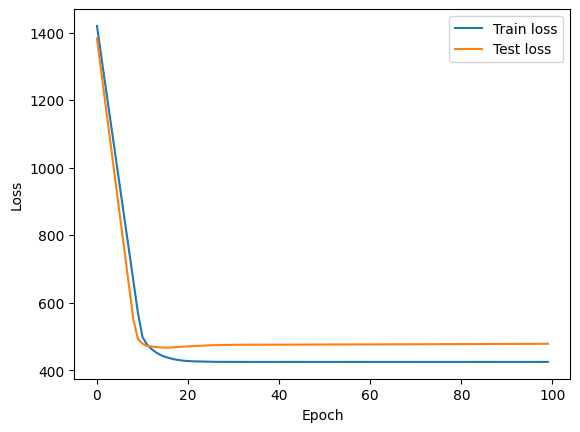

In [29]:
# Convert data types
train_features = train_features.float()
train_target = train_target.float()
test_features = test_features.float()
test_target = test_target.float()

# reshape
train_features = train_features.view(-1, 1)
test_features = test_features.view(-1, 1)
train_target = train_target.view(-1,1)
test_target = test_target.view(-1,1)

# Create an optimizer
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.001)

# Define the loss function
loss_fn = nn.L1Loss()

# Set the number of epochs
num_epochs = 100

# Lists to store loss values for plotting
train_losses = []
test_losses = []

# Train the model
for epoch in tqdm(range(num_epochs)):
    # Reset gradients
    optimizer.zero_grad()

    # Training step
    linear_model.train()
    predictions = linear_model(train_features)
    loss = loss_fn(predictions, train_target)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.detach().numpy())

    # Testing step
    linear_model.eval()
    #set inference mode so that we just output results without taking gradients
    with torch.inference_mode():
        predictions = linear_model(test_features)
        loss = loss_fn(predictions, test_target)
        test_losses.append(loss.detach().numpy())

# Plot loss against epoch
plt.plot(range(num_epochs), train_losses, label="Train loss")
plt.plot(range(num_epochs), test_losses, label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [30]:
linear_model.eval()
#make predictions on test set
with torch.inference_mode():
  y_preds = linear_model(test_features)
y_preds

tensor([[1106.7197],
        [ 143.8989],
        [ 838.8382],
        [1378.4838],
        [2888.7148],
        [2768.3623],
        [ 380.7218],
        [2139.4229],
        [1813.3060],
        [1032.9552],
        [ 730.1326],
        [2985.7734],
        [2721.7742],
        [1188.2489],
        [2415.0691],
        [ 718.4856],
        [ 167.1930],
        [2193.7756],
        [ 636.9564],
        [ 369.0748],
        [ 986.3672],
        [ 143.8989],
        [2830.4797],
        [1273.6605],
        [ 702.9562],
        [1211.5430],
        [ 675.7798],
        [ 353.5454],
        [1075.6610],
        [2566.4805],
        [ 858.2499],
        [1541.5421],
        [1572.6008],
        [1339.6603],
        [2531.5393],
        [ 105.0755],
        [2294.7166],
        [1867.6588],
        [2954.7146],
        [1401.7778],
        [1230.9547],
        [  62.3697],
        [1692.9535],
        [1262.0134],
        [1533.7775],
        [ 551.5449],
        [   8.0169],
        [1607

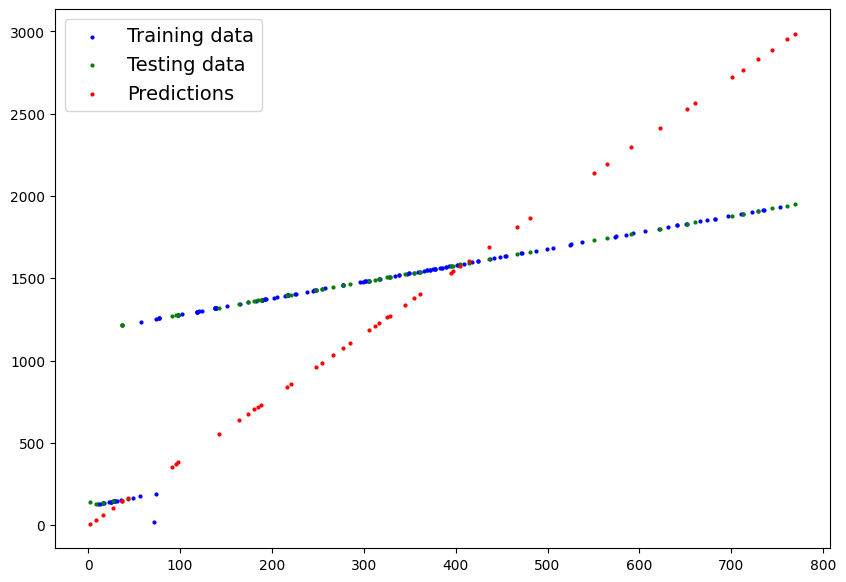

In [31]:
plot_predictions(train_data=train_features,
                     train_labels=train_target,
                     test_data=test_features,
                     test_labels=test_target,
                     predictions=y_preds.cpu())

The decreasing loss indicates progress in training, but the model's predictive accuracy isn't yet optimal, as evident from the plot. Enhancing performance could involve adopting a more sophisticated model architecture or refining hyperparameters. Exploring these adjustments can lead to better alignment between predictions and expected outcomes.

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)